In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

%matplotlib inline

In [2]:
# 读取数据
data = pd.read_csv('./train.csv')

In [3]:
# 将datetime转换数据类型,设置为index
data['Datetime'] = pd.to_datetime(data.Datetime, format='%d-%m-%Y %H:%M')

In [4]:
# 将Datetime设置为index
data.set_index(['Datetime'], inplace=True)

In [5]:
# 重采样
data = data.resample('D').sum()
data.index

DatetimeIndex(['2012-08-25', '2012-08-26', '2012-08-27', '2012-08-28',
               '2012-08-29', '2012-08-30', '2012-08-31', '2012-09-01',
               '2012-09-02', '2012-09-03',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-20', '2014-09-21', '2014-09-22', '2014-09-23',
               '2014-09-24', '2014-09-25'],
              dtype='datetime64[ns]', name='Datetime', length=762, freq='D')

In [6]:
# 生成一个ds列
data['ds'] = data.index

In [7]:
data.head()

,ID,Count,ds
Datetime,,,
2012-08-25,276,76,2012-08-25
2012-08-26,852,88,2012-08-26
2012-08-27,1428,62,2012-08-27
2012-08-28,2004,58,2012-08-28
2012-08-29,2580,60,2012-08-29


In [8]:
# 重命名,rename
data.rename(columns = {'Count':'y'}, inplace=True)
data.head()

,ID,y,ds
Datetime,,,
2012-08-25,276,76,2012-08-25
2012-08-26,852,88,2012-08-26
2012-08-27,1428,62,2012-08-27
2012-08-28,2004,58,2012-08-28
2012-08-29,2580,60,2012-08-29


### ds 和 y 都要是columns, 即不能直接以ds为index,不然会报错

In [9]:
# 模型拟合
model = Prophet()
model.fit(data)

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
# 制作未来7个月的columns
future = model.make_future_dataframe(periods=30*7)
future.tail()

,ds
967,2015-04-19
968,2015-04-20
969,2015-04-21
970,2015-04-22
971,2015-04-23


In [11]:
# 预测
forest = model.predict(future)
forest.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
967,2015-04-19,16183.928057,13626.435825,16212.586394,15775.341296,16591.437146,-1326.855323,-1326.855323,-1326.855323,-1144.363528,-1144.363528,-1144.363528,-182.491795,-182.491795,-182.491795,0.0,0.0,0.0,14857.072733
968,2015-04-20,16211.506396,15109.019631,17732.881120,15797.506726,16619.743887,255.943195,255.943195,255.943195,457.637313,457.637313,457.637313,-201.694118,-201.694118,-201.694118,0.0,0.0,0.0,16467.449591
969,2015-04-21,16239.084736,15345.695298,17878.413932,15821.142988,16650.775544,381.317752,381.317752,381.317752,608.436315,608.436315,608.436315,-227.118562,-227.118562,-227.118562,0.0,0.0,0.0,16620.402488
970,2015-04-22,16266.663075,15267.680473,17822.490794,15846.893943,16681.681229,298.602590,298.602590,298.602590,556.966449,556.966449,556.966449,-258.363859,-258.363859,-258.363859,0.0,0.0,0.0,16565.265665
971,2015-04-23,16294.241414,15126.529002,17651.428419,15871.317818,16712.594261,65.534463,65.534463,65.534463,360.430174,360.430174,360.430174,-294.895712,-294.895712,-294.895712,0.0,0.0,0.0,16359.775877


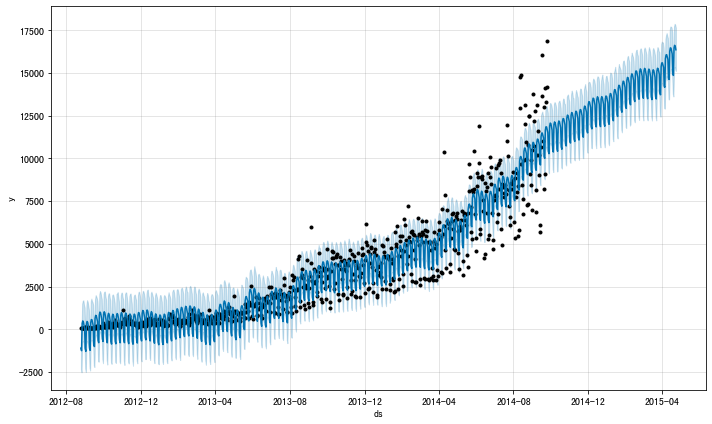

In [12]:
# 绘制预测结果
model.plot(forest)
plt.show()

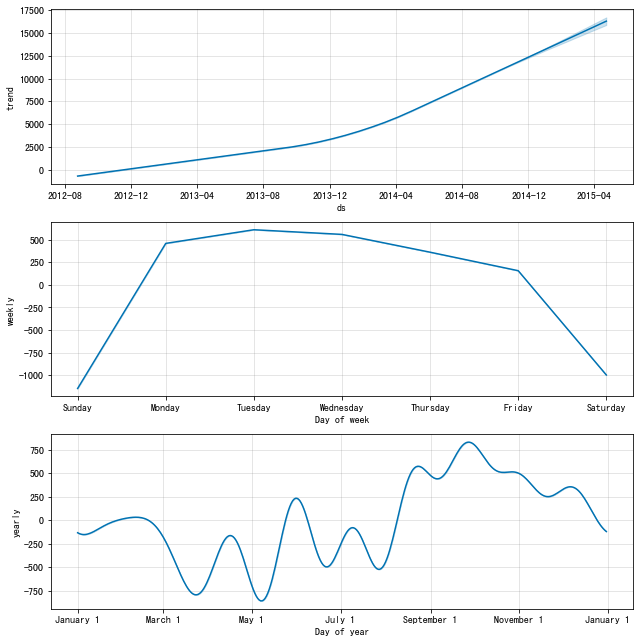

In [13]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forest)
plt.show()